## Overzicht van toetsen

| Variabele                  | Observatie      |                        Grafiek                        | Toets            |
|----------------------------|-----------------|:-----------------------------------------------------:|------------------|
| 1 Categorisch              | Frequenties     |      <img src="categorisch_1.png" height="100">       | Proportietest    |
| **2 Categorisch**          | **Frequenties** |      <img src="categorisch_2.png" height="100">       | **Chi-kwadraat** |
| 1 Numeriek                 | Gemiddelde      |        <img src="numeriek_1.png" height="100">        | T-toets          |
| X Categorisch + 1 Numeriek | Gemiddelde      | <img src="categorisch_2_numeriek_1.png" height="100"> | T-toets of ANOVA |
| 2 Numeriek                 | Waarden         |        <img src="numeriek_2.png" height="100">        | Correlatie       |


# Chi-kwadraat toets met twee categorische variabelen

Er zijn twee soorten $\chi^2$ toetsen:
* **$\chi^2$ toets voor goedheid-van-fit**
* **$\chi^2$ toets voor onafhankelijkheid**

Wij behandelen alleen de eerste soort, maar de tweede soort is analoog. Bij een $\chi^2$ goedheid-van-fit toets gaan we na of de verdeling van een steekproef over een categorische variabele overeenkomt met een verdeling die we verwachten op basis van een nulhypothese.

* Hier is de **hypothese** een veronderstelling over de verdeling van een categorische variabele.
    * De **nulhypothese** $H_0$ is dat de verdeling overeenkomt met de verwachte verdeling.
    * De **alternatieve hypothese** $H_1$ is dat de verdeling **niet** overeenkomt met de verwachte verdeling.
    * De **$\chi^2$ toets** is altijd een **eenzijdige** toets.
* We doen een **steekproef** van grootte $n$ en tellen het aantal observaties in elk van de $k$ categorieën.
    * We noteren de **geobserveerde frequenties** als $O_i$, met $i$ het nummer van de categorie.
    * We noteren de **verwachte frequenties** als $E_i$.
* Een **steekproeffunctie** is een functie die een steekproef afbeeldt op een getal, in dit geval:
    * We noteren de **geobserveerde frequenties** als $O_i$, met $i$ het nummer van de categorie.
    * We noteren de **verwachte frequenties** als $E_i$.        
* Een steekproef doen is een **toevalsexperiment**, en daarom is het steekproefgemiddelde dan ook een toevalsveranderlijke, hier genaamd ${\Chi^2}$.
    * $\Chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$ 
    * $\Chi^2$ heeft dan een kansverdeling, en die noemen we de **$\Chi^2$ verdeling**.

## Stappenplan

1. formuleer de **hypotheses**
2. kies een **significantieniveau** $\alpha$
3. doe een **steekproef** van grootte $n$ en bepaal de **geobserveerde frequenties** $O_i$.
4. bepaal de $\chi^2$-waarde van het **aanvaardingsinterval** die hoort bij het significantieniveau $\alpha$ en het aantal categorieën $k$ m.b.v. de inverse kansfunctie (`ppf`) van de $\chi^2$-verdeling
      * steeds eenzijdig: $[0, \chi^2_{1-\alpha, k-1}]$
5. bereken nu de $\chi^2$-waarde van de steekproef m.b.v. de formule:
    * $\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$
    * controleer of $\chi^2 \in \left[0, \chi^2_{1-\alpha, k-1}\right]$ en verwerp $H_0$ als dit niet het geval is.
6. bepaal de **overschrijdingskans p** of **p-value** van $\chi^2$ m.b.v. de cumulatieve kansfunctie (`cdf`) van de $chi^2$-verdeling
      * eenzijdig: $p = P(\Chi^2 > \chi^2 \mid H_0)$ 
      * als $p < \alpha$ dan verwerpen we $H_0$, anders niet.

## Voorbeeld 1

We willen nagaan of de verkoop van bepaalde producten overeenkomt met de verwachte verdeling. 

| &nbsp;              | Computers | Films | Spelletjes | Televisies |
|---------------------|:---------:|:-----:|:----------:|:----------:|
| Verwachte aantallen |     9     |   3   |     9      |     9      |

In [16]:
import numpy as np

E = np.array([9, 3, 9, 9])
k = len(E)  # aantal categorieën


### Stap 1 - Hypothesen opstellen

* $H_0$: de verdeling van de verkopen komt overeen met de verwachte verdeling
* $H_1$: de verdeling van de verkopen komt **niet** overeen met de verwachte verdeling

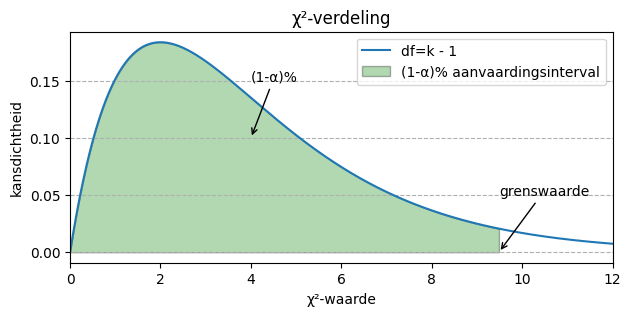

In [17]:
from scripts import plot_chi_square

plot_chi_square()


### Stap 2 - Significantieniveau $\alpha$ kiezen

We kiezen $\alpha=0.05$. We hebben dus nog altijd 5% kans dat ons besluit door (stom toeval) verkeerd zal zijn. Dit moet **vooraf** gekozen worden, en daarom dat wetenschappers meestal ook meerdere studies doen alvorens ze besluiten trekken.


In [28]:
# We kiezen een significantieniveau α
α = 0.05

### Stap 3 - Steekproef doen met grootte $n$

We doen een steekproef van 30 verkopen en vinden de volgende verdeling:

| &nbsp;                  | Computers | Films | Spelletjes | Televisies |
|-------------------------|:---------:|:-----:|:----------:|:----------:|
| Geobserveerde aantallen |    15     |   3   |     7      |     5      |


In [19]:
# De gegevens uit de onze steekproef
O = np.array([15, 3, 7, 5])


### Stap 4 - Aanvaardingsinterval berekenen

Een $\chi^2$-toets is altijd een **eenzijdige** toets, dus we moeten een **eenzijdig aanvaardingsinterval** bepalen. We bepalen dus de grens $\chi^2_{1-\alpha, k-1}$ van het aanvaardingsinterval op de $\chi^2$-verdeling.

Dit is de waarde die hoort bij een kans $\alpha$. We kunnen deze waarde berekenen m.b.v. de inverse kansfunctie (`ppf`) van de $\chi^2$-verdeling.

In [29]:
import numpy as np
from scipy import stats

x1 = stats.chi2.ppf(q=1 - α, df=k - 1)
x1_2 = np.array([0, x1])
print(f'Het aanvaardingsinterval is {x1_2}')

Het aanvaardingsinterval is [0.        7.8147279]


### Stap 5 - $\chi^2$-waarde berekenen van de steekproef

Nu bepaal je de $\chi^2$-waarde van de steekproef m.b.v. de formule: 
\
$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$

In [21]:
x = np.sum((O - E) ** 2 / E)
print(f'x = {x:.2f}')

x = 6.22


We kunnen nu controleren of $\chi^2$ in het interval ligt en $H_0$ verwerpen als dit niet het geval is.
Aangezien $\chi^2 = 6.22$ en $\chi^2 \in \left[0, 7.81\right]$, kunnen we $H_0 **niet** verwerpen.$.

### Stap 6 - De overschrijdingskans p berekenen

We kunnen ook de p-value bereken. De p-value is de **kans** dat we dit uitzonderlijke resultaat vinden, gegeven dat $H_0$ waar is.
Omdat het hier gaat om een eenzijdige toets moeten we dus de kans berekenen op de $\chi^2$-waarde. Als deze kans kleiner is dan $\alpha$, dan verwerpen we $H_0$. 
\
$p = P(\Chi^2 > \chi^2 \mid H_0)$

In [22]:
p_value = stats.chi2.sf(x, df=k - 1)
print(f'p-value={p_value:.4f} is groter dan α={α} --> we H0 niet verwerpen')

p-value=0.1013 is groter dan α=0.05 --> we H0 niet verwerpen


## Voorbeeld 2 

We willen nagaan of de verkoop van bepaalde producten overeenkomt met de verwachte verdeling. 

| &nbsp;              | Computers | Films | Spelletjes | Televisies |
|---------------------|:---------:|:-----:|:----------:|:----------:|
| Verwachte aantallen |     9     |   3   |     9      |     9      |

In [23]:
import numpy as np

E = np.array([9, 3, 9, 9])
k = len(E)  # aantal categorieën


### Stap 1 - Hypothesen opstellen

Blijft hetzelfde als in voorbeeld 1.

### Stap 2 - Significantieniveau $\alpha$ kiezen

Blijft hetzelfde als in voorbeeld 1.


### Stap 3 - Steekproef doen met grootte $n$

We doen een steekproef van 30 verkopen en vinden **ditmaal** de volgende verdeling:  

| &nbsp;                  | Computers | Films | Spelletjes | Televisies | Totaal |
|-------------------------|:---------:|:-----:|:----------:|:----------:|:------:|
| Geobserveerde aantallen |     5     |   8   |     7      |     10     |   30   |


In [24]:
# De gegevens uit de onze steekproef
O = np.array([5, 8, 7, 10])


### Stap 4 - Aanvaardingsinterval berekenen

Blijft hetzelfde als in voorbeeld 1, want het significantieniveau is hetzelfde en het aantal categorieën is hetzelfde.

### Stap 5 - $\chi^2$-waarde berekenen van de steekproef

Nu bepaal je de $\chi^2$-waarde van de steekproef m.b.v. de formule: 
\
$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$

In [25]:
x = np.sum((O - E) ** 2 / E)
print(f'x = {x:.2f}')

x = 10.67


We kunnen nu controleren of $\chi^2$ in het interval ligt en $H_0$ verwerpen als dit niet het geval is.
Aangezien $\chi^2 = 10.67$ en $\chi^2 \notin \left[0, 7.81\right]$, kunnen $H_0$ nu **wel** verwerpen.

### Stap 6 - De overschrijdingskans p berekenen

We kunnen ook de p-value bereken. De p-value is de **kans** dat we dit uitzonderlijke resultaat vinden, gegeven dat $H_0$ waar is.
Omdat het hier gaat om een eenzijdige toets moeten we dus de kans berekenen op de $\chi^2$-waarde. Als deze kans kleiner is dan $\alpha$, dan verwerpen we $H_0$. 
\
$p = P(\Chi^2 > \chi^2 \mid H_0)$

In [26]:
p_value = stats.chi2.sf(x, df=k - 1)
print(f'p-value={p_value:.4f} is kleiner dan α={α} --> we verwerpen H0')

p-value=0.0137 is kleiner dan α=0.05 --> we verwerpen H0


## Algemeen besluit

Op basis van de eerste steekproef kunnen we niet besluiten dat de verdeling van de verkopen **niet** overeenkomt met de verwachte verdeling. Op basis van de tweede steekproef kunnen we wel besluiten dat de verdeling van de verkopen **niet** overeenkomt met de verwachte verdeling.

Welke factoren kunnen het besluit beïnvloeden?
* het significantieniveau $\alpha$ 
* het aantal categorieën $k$
* de grootte van de steekproef $n$
* de verdeling van de geobserveerde frequenties $O_i$
* de verdeling van de verwachte frequenties $E_i$
 